# The Fashion MNIST dataset

Tutorial source: https://www.tensorflow.org/tutorials/keras/classification

Convolutional Neural Networks: https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF

**You can verify that TensorFlow will utilize the GPU using a simple script:**

In [1]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)



Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

The Fashion MNIST dataset is a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

**Label:**	**Class**

0:    T-shirt/top

1:    Trouser

2:    Pullover

3:    Dress

4:    Coat

5:    Sandal

6:    Shirt

7:    Sneaker

8:    Bag

9:    Ankle boot

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploration

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# The convolutional layer will need the input to have 4 dimensions
# (info about how many channels the images have: in our case, just 1)
train_images=train_images.reshape(60000, 28, 28, 1)
train_images.shape

test_images=test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

Likewise, there are 60,000 labels in the training set:

In [6]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [7]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that it is a boot represented in a scale of grays:

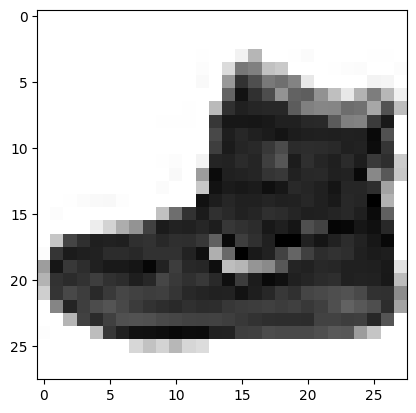

In [8]:
item = train_images[0]
plt.imshow(item, cmap=plt.cm.binary)
plt.show()

The pixel values fall in the range of 0 to 255:

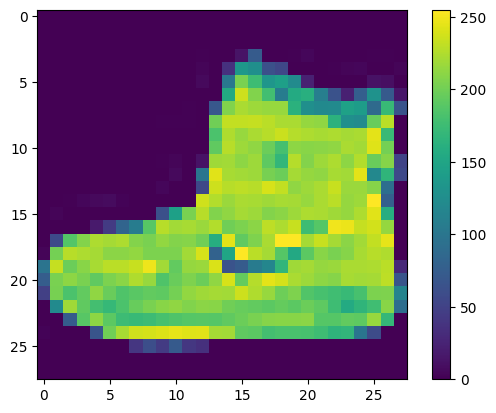

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

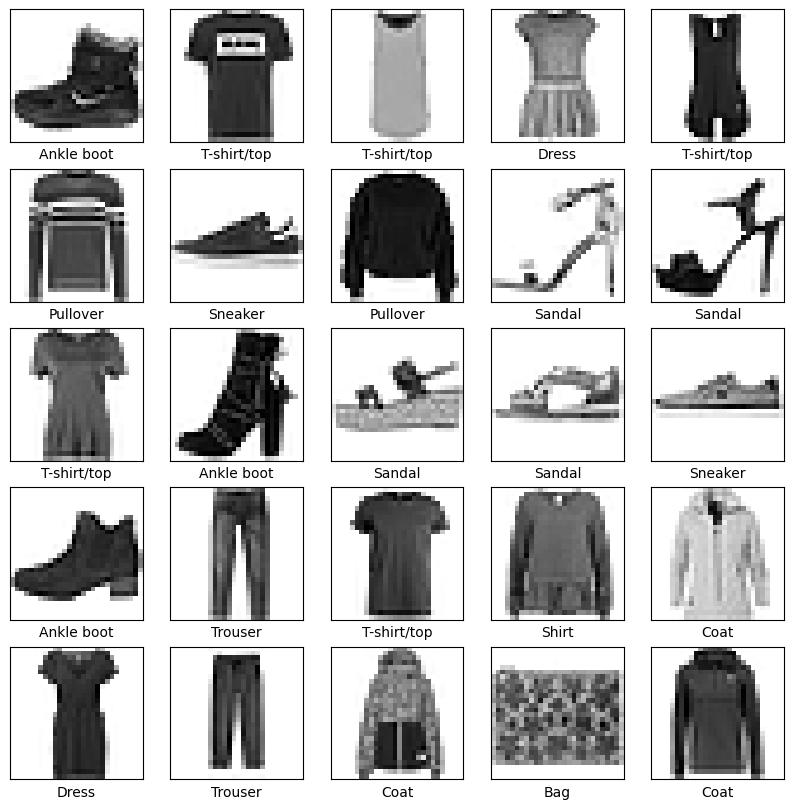

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Your task:

Build a simple Sequential neural network that classifies the images.

Challenge: avhieve a test accuracy above 87%

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2024-04-29 17:48:59.077691: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 491us/step - loss: 2.9689 - accuracy: 0.6720
Epoch 2/10
1875/1875 [==============================] - 1s 446us/step - loss: 0.7805 - accuracy: 0.7124
Epoch 3/10
1875/1875 [==============================] - 1s 446us/step - loss: 0.7160 - accuracy: 0.7149
Epoch 4/10
1875/1875 [==============================] - 1s 446us/step - loss: 0.6608 - accuracy: 0.7386
Epoch 5/10
1875/1875 [==============================] - 1s 449us/step - loss: 0.6131 - accuracy: 0.7646
Epoch 6/10
1875/1875 [==============================] - 1s 453us/step - loss: 0.5842 - accuracy: 0.7977
Epoch 7/10
1875/1875 [==============================] - 1s 450us/step - loss: 0.5538 - accuracy: 0.8135
Epoch 8/10
1875/1875 [==============================] - 1s 448us/step - loss: 0.5418 - accuracy: 0.8199
Epoch 9/10
1875/1875 [==============================] - 1s 451us/step - loss: 0.5372 - accuracy: 0.8208
Epoch 10/10
1875/1875 [==============================] - 1s 449us/step - lo

In [14]:
test_results = {}

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

test_results["nn_model"] = test_acc*100

test_results

{'nn_model': 82.17999935150146}

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

313/313 [==============================] - 0s 423us/step


array([4.0570040e-24, 2.0474099e-18, 0.0000000e+00, 1.3567450e-17,
       0.0000000e+00, 3.2995153e-02, 5.7850412e-26, 5.7472121e-02,
       1.0689524e-14, 9.0953279e-01], dtype=float32)

In [16]:
print(np.argmax(predictions[0]))
print(test_labels[0])


9
9


### Verifying predictions

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

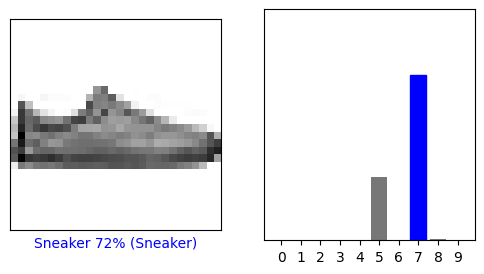

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

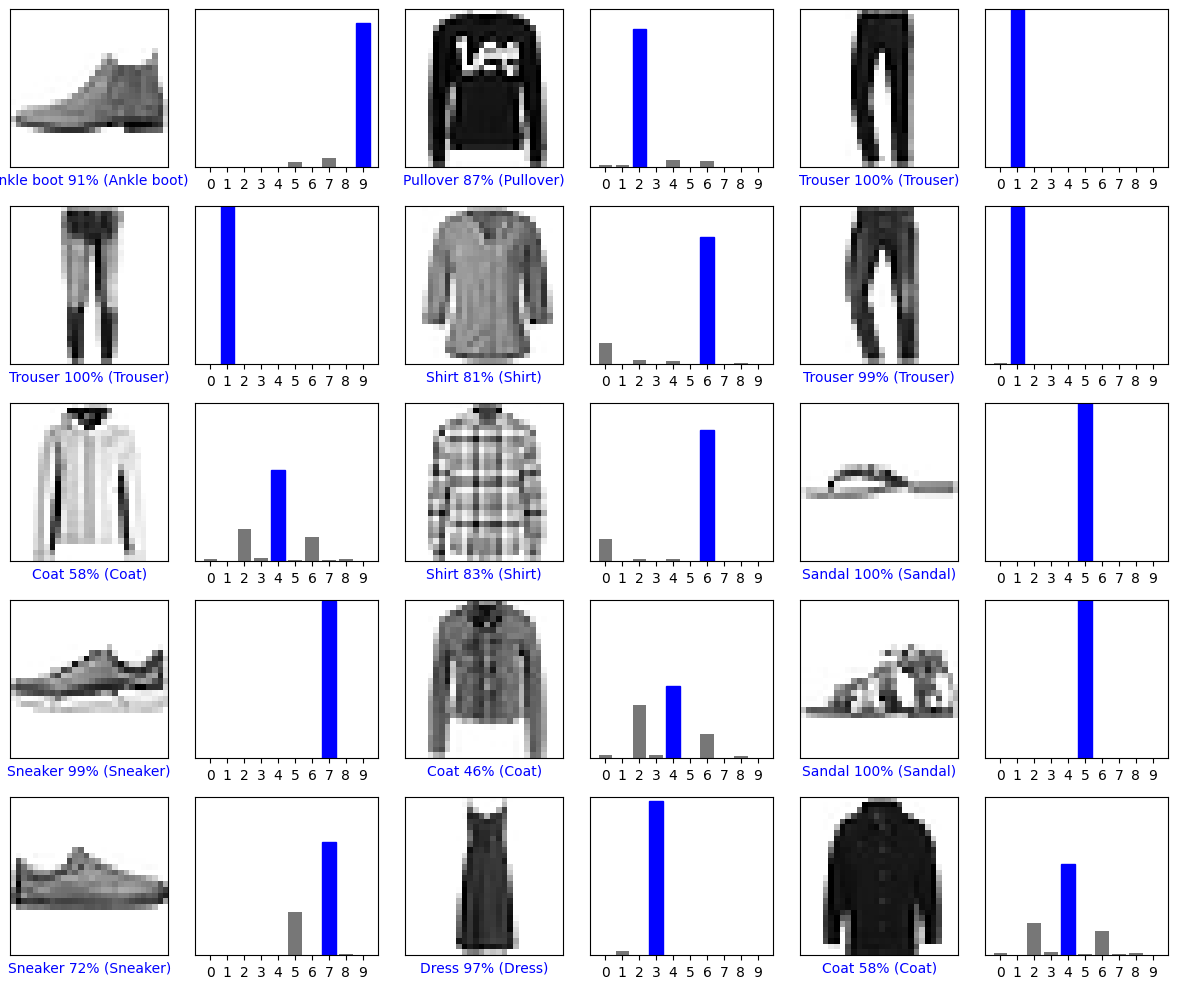

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Adding Convolutions and Pooling

In [20]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         activation='relu', 
                         input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), 
                               strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [21]:
cnn_model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7718 - accuracy: 0.8579
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2771 - accuracy: 0.9019
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2477 - accuracy: 0.9100
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2233 - accuracy: 0.9179
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2007 - accuracy: 0.9260


In [22]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=0)

test_results["cnn_model"] = test_acc*100

test_results

{'nn_model': 82.17999935150146, 'cnn_model': 88.67999911308289}

In [23]:
# Saving the model (the weights)
cnn_model.save_weights('models/fashion_cnn_model')

In [24]:
# Create a new model instance
loaded_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         activation='relu', 
                         input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), 
                               strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

loaded_model.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Restore the weights
loaded_model.load_weights('models/fashion_cnn_model')

# Evaluate the model
loss, acc = loaded_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3544 - accuracy: 0.8868 - 479ms/epoch - 2ms/step


## Adding more convolutions and more pooling

In [25]:
cnn_deep_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

cnn_deep_model.compile(optimizer='adam', 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

cnn_deep_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [26]:
cnn_deep_model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = cnn_deep_model.evaluate(test_images, test_labels, verbose=0)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5816 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3395 - accuracy: 0.8753
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2991 - accuracy: 0.8878
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2752 - accuracy: 0.8979
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2515 - accuracy: 0.9058


In [28]:
test_results["cnn_deep_model"] = test_acc*100

test_results

{'nn_model': 82.17999935150146,
 'cnn_model': 88.67999911308289,
 'cnn_deep_model': 89.06999826431274}

In [29]:
# Saving the model (the weights)
cnn_deep_model.save_weights('models/fashion_cnn_deep_model')

In [30]:
# Create a new model instance
loaded_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

loaded_model.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Restore the weights
loaded_model.load_weights('models/fashion_cnn_deep_model')

# Evaluate the model
loss, acc = loaded_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3104 - accuracy: 0.8907 - 911ms/epoch - 3ms/step
